# WOMEN IN DATA SCIENCE TEXAS DATATHON

## Problem statement

*Forecasting hourly electrical load in each zone in the short-term (the next 7 days).*

This year's challenge will focus on electricity load forecasting. Load forecasting is the predicting of electrical power required to meet the short or long-term demand. The forecasting helps utility companies plan on their capacity to keep the electricity running in every household and business.

You will build models to learn how the electrical load was inferenced by key factors (e.g., weather) using historical data and make the forecast to a near-future period.

<img src="https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/ercotWeatherZoneMap.png" alt="weather zone" width="400"/>

### More information - Visit [website](https://widstexas2021.github.io/datathon/)
---
author:
  - [Samaya Madhavan, Senior Software Engineer, IBM](https://www.linkedin.com/in/samaya-madhavan/)
---

WiDS Texas Ambasaddors 

## SESSION 1 - DATA PREPROCESSING USING PYTHON AND PANDAS

### What is data preprocessing? 

Process of converting raw data into useful format.

![ML-steps](https://raw.githubusercontent.com/samayamadhavan/datathon/main/assets/images/machine-learning-steps.png)



## Content

1. Install and import Python libraries
1. Process historical hourly electrical load data in each each ERCOT zone
1. Process historical tri-hourly weather dataset in major cities across ERCOT zone
1. Combine electrical load data and weather data

## 1. Install and import Python libraries

### What is pandas? 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [60]:
!pip install --upgrade pandas

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: pandas in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.2.4)


In [61]:
import pandas as pd
pd.__version__

'1.2.4'

In [62]:
import os, types
import io, requests
from datetime import datetime

In [63]:
import matplotlib.pyplot as plt

## 2. Process historical hourly electrical load data in each each ERCOT zone

The load on the grid varies based on a very large number of factors. Some of the most significant are:

1. Time of Day: More electricity is used at times when people are most active
1. Weather: More electricity is used during the warmer months, due to air-conditioning units

### ERCOT Hourly Power Load 

* ercot_hourly_load.csv: Includes hourly power load in the eight ERCTO weather zones. The most recent few weeks of data is from ERCOT Actual System Load, while earlier data is from ERCOT Load Data Archives.
* weather_zone_cities.json lists all Texas cities in each ERCTO weather zone.
* weather_zone_counties.json lists all Texas counties in each ERCTO weather zone.

### 2.1 Import dataset from github using Pandas

This dataset is located on the [GitHub repository](https://github.com/WiDSTexas2021/datathon-code).

In [64]:
url = "https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/ercot_hourly_load.csv"
s=requests.get(url).content
ercot_hourly_df =pd.read_csv(io.StringIO(s.decode('utf-8')))

### 2.2 - Data exploration



In [65]:
ercot_hourly_df.columns

Index(['Hour_Ending', 'Coast', 'East', 'Far West', 'North', 'North Central',
       'South', 'South Central', 'West'],
      dtype='object')

In [66]:
ercot_hourly_df.head()

,Hour_Ending,Coast,East,Far West,North,North Central,South,South Central,West
0,2005-01-01 01:00:00-06:00,7507.810731,850.313988,998.465500,741.963778,7312.259820,1883.979457,3728.400885,692.294503
1,2005-01-01 02:00:00-06:00,7257.549136,818.143264,987.532852,711.996586,7012.466197,1798.234153,3562.614723,675.176013
2,2005-01-01 03:00:00-06:00,6973.987199,783.396624,978.575662,687.881144,6712.807281,1712.758395,3373.868049,659.650453
3,2005-01-01 04:00:00-06:00,6794.489296,760.639635,959.486947,673.419383,6502.378446,1651.210254,3239.047417,648.512894
4,2005-01-01 05:00:00-06:00,6685.186677,743.371691,955.268590,664.792118,6440.559639,1627.872766,3176.859720,647.001780


In [67]:
ercot_hourly_df.dtypes

Hour_Ending       object
Coast            float64
East             float64
Far West         float64
North            float64
North Central    float64
South            float64
South Central    float64
West             float64
dtype: object

In [68]:
ercot_hourly_df['Hour_Ending'].dtype

dtype('O')

In [69]:
ercot_hourly_describe = ercot_hourly_df.describe()
ercot_hourly_describe

,Coast,East,Far West,North,North Central,South,South Central,West
count,143662.000000,143662.000000,143662.000000,143662.000000,143662.000000,143662.000000,143662.000000,143662.000000
mean,11007.752355,1407.893592,1950.475969,914.038975,12639.209217,3062.851970,6309.054919,1082.549909
std,2632.210501,333.911782,853.303759,256.559820,3492.885374,840.271967,1723.107972,251.681141
min,1702.829343,737.857378,872.014264,473.038562,6211.523935,1351.410393,3055.595655,571.771569
25%,9120.142176,1175.094026,1258.868186,731.242859,10233.463941,2436.321621,5101.387399,899.853618
50%,10459.546666,1336.664297,1656.472259,846.785465,11798.676624,2918.793169,5904.424295,1040.989249
75%,12448.317613,1589.026829,2388.500518,1037.406231,14419.565571,3555.917973,7220.219213,1222.565467
max,21256.115190,2949.198517,4438.851497,2305.722761,26499.240955,6192.252947,14166.701623,2117.399078


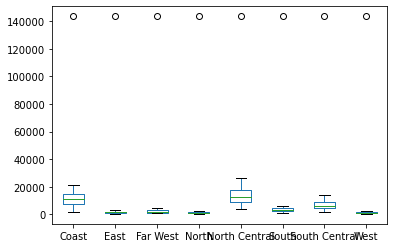

In [70]:
ercot_hourly_describe.plot.box()

### 2.3 Handle missing data

In [71]:
ercot_hourly_df.isna().any()

Hour_Ending      False
Coast             True
East              True
Far West          True
North             True
North Central     True
South             True
South Central     True
West              True
dtype: bool

In [72]:
ercot_hourly_df[ercot_hourly_df.isna().any(axis=1)]

,Hour_Ending,Coast,East,Far West,North,North Central,South,South Central,West
103871,2016-11-07 00:00:00-06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
ercot_hourly_df = ercot_hourly_df.fillna(method='ffill')

In [74]:
ercot_hourly_df[ercot_hourly_df.isna().any(axis=1)]

,Hour_Ending,Coast,East,Far West,North,North Central,South,South Central,West


### 2.4 - datetime - change from *offset-aware* to *offset-naive*

What is a time series dataset? - Data collected at different point in time over even intervals. 

*A timezone's offset refers to how many hours the timezone is from Coordinated Universal Time (UTC).*




In [75]:
ercot_hourly_df['Hour_Ending']

0         2005-01-01 01:00:00-06:00
1         2005-01-01 02:00:00-06:00
2         2005-01-01 03:00:00-06:00
3         2005-01-01 04:00:00-06:00
4         2005-01-01 05:00:00-06:00
                    ...            
143658    2021-05-22 20:00:00-05:00
143659    2021-05-22 21:00:00-05:00
143660    2021-05-22 22:00:00-05:00
143661    2021-05-22 23:00:00-05:00
143662    2021-05-23 00:00:00-05:00
Name: Hour_Ending, Length: 143663, dtype: object

### Example 1 - '2005-01-01 01:00:00-05:00'

In [76]:
time_type_1 = '2005-01-01 01:00:00-05:00'


#parse time string into a time object in a specified format. 
dt_1 = datetime.strptime(time_type_1, '%Y-%m-%d %H:%M:%S%z')

#print time and timezone name
print('time before conversion :' ,dt_1) 
print('time zone in offset-aware format :' ,dt_1.tzname()) 
print()

#convert time into timestamp
timestamp_1 = dt_1.timestamp()
print('time converted to timestamp : ', timestamp_1)
print()

date_from_timestamp_1 = datetime.fromtimestamp(timestamp_1)
#d = date_timestamp_1.strftime("%m/%d/%Y, %H:%M:%S")
print('time after conversion :' ,date_from_timestamp_1)
print('time zone in offset-naive format :' ,date_from_timestamp_1.tzname()) 



time before conversion : 2005-01-01 01:00:00-05:00
time zone in offset-aware format : UTC-05:00

time converted to timestamp :  1104559200.0

time after conversion : 2005-01-01 06:00:00
time zone in offset-naive format : None


### Example 2 - '2005-01-01 01:00:00-06:00'

In [77]:
time_type_2 = '2005-01-01 01:00:00-06:00'

#parse time string into a time object in a specified format. 
dt_2 = datetime.strptime(time_type_2, '%Y-%m-%d %H:%M:%S%z')

#print time and timezone name
print('time before conversion :' ,dt_2) 
print('time zone in offset-aware format :' ,dt_2.tzname()) 
print()

#convert time into timestamp
timestamp_2 = dt_2.timestamp()
print('time converted to timestamp : ', timestamp_2)
print()

date_from_timestamp_2 = datetime.fromtimestamp(timestamp_2)

print('time after conversion :' ,date_from_timestamp_2)
print('time zone in offset-naive format :' ,date_from_timestamp_2.tzname()) 



time before conversion : 2005-01-01 01:00:00-06:00
time zone in offset-aware format : UTC-06:00

time converted to timestamp :  1104562800.0

time after conversion : 2005-01-01 07:00:00
time zone in offset-naive format : None


In [78]:
ercot_hourly_df['Hour_Ending_Naive'] = ercot_hourly_df['Hour_Ending'].apply(lambda x: datetime.fromtimestamp(datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S%z').timestamp()))
#.strftime("%m/%d/%Y, %H:%M:%S")

In [79]:
ercot_hourly_df = ercot_hourly_df.drop(['Hour_Ending'],axis=1)

In [80]:
ercot_hourly_df['Hour_Ending_Naive']

0        2005-01-01 07:00:00
1        2005-01-01 08:00:00
2        2005-01-01 09:00:00
3        2005-01-01 10:00:00
4        2005-01-01 11:00:00
                 ...        
143658   2021-05-23 01:00:00
143659   2021-05-23 02:00:00
143660   2021-05-23 03:00:00
143661   2021-05-23 04:00:00
143662   2021-05-23 05:00:00
Name: Hour_Ending_Naive, Length: 143663, dtype: datetime64[ns]

### 2.5 . Index and filter datetime column to match with historical weather dataset 

In [81]:
ercot_hourly_df = ercot_hourly_df.set_index(['Hour_Ending_Naive'])

In [82]:
print(len(ercot_hourly_df))

143663


In [83]:
starting_timestamp = '2008-07-01 00:00:00'
ending_timestamp = ercot_hourly_df.index[-1]
print(ending_timestamp)
ercot_hourly_df = ercot_hourly_df[pd.Timestamp(starting_timestamp):pd.Timestamp(ending_timestamp)]

2021-05-23 05:00:00


In [84]:
ercot_hourly_df.head(30)

,Coast,East,Far West,North,North Central,South,South Central,West
Hour_Ending_Naive,,,,,,,,
2008-07-01 00:00:00,14636.792617,1834.893991,1407.081587,1718.920291,17452.218597,3725.380524,9402.117510,1152.332422
2008-07-01 01:00:00,14143.251055,1772.966737,1408.005947,1647.615128,16531.112491,3554.510429,9044.579292,1123.386233
2008-07-01 02:00:00,13818.196398,1697.195008,1388.808365,1561.924284,15630.586123,3484.967078,8758.580012,1087.910917
2008-07-01 03:00:00,13372.853879,1607.313026,1380.070684,1527.516833,15233.563706,3415.020012,8580.818978,1075.904917
2008-07-01 04:00:00,12386.530845,1466.076119,1334.339634,1400.934504,13925.950362,3222.573761,7948.203079,1009.420380
2008-07-01 05:00:00,11382.287900,1355.577310,1248.461630,1238.439970,12407.476000,2946.577600,7152.954670,916.192670
2008-07-01 06:00:00,10233.975699,1280.929579,1210.183411,1130.739664,11277.215516,2724.392422,6509.912685,872.596686
2008-07-01 07:00:00,9656.662104,1221.128539,1178.877662,1050.738480,10468.390522,2574.735312,6094.321351,829.419681
2008-07-01 08:00:00,9253.200129,1172.281951,1154.309255,991.552786,9917.421758,2443.014223,5801.818915,798.814534


In [85]:
print(len(ercot_hourly_df))

113022


### 2.6 Visualize data 

Text(0.5, 1.0, 'West')

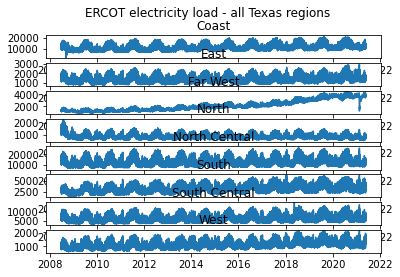

In [86]:
fig, axs = plt.subplots(8)
fig.suptitle('ERCOT electricity load - all Texas regions')
axs[0].plot(ercot_hourly_df.index,ercot_hourly_df['Coast'])
axs[0].set_title("Coast")
axs[1].plot(ercot_hourly_df.index,ercot_hourly_df['East'])
axs[1].set_title("East")
axs[2].plot(ercot_hourly_df.index,ercot_hourly_df['Far West'])
axs[2].set_title("Far West")
axs[3].plot(ercot_hourly_df.index,ercot_hourly_df['North'])
axs[3].set_title("North")
axs[4].plot(ercot_hourly_df.index,ercot_hourly_df['North Central'])
axs[4].set_title("North Central")
axs[5].plot(ercot_hourly_df.index,ercot_hourly_df['South'])
axs[5].set_title("South")
axs[6].plot(ercot_hourly_df.index,ercot_hourly_df['South Central'])
axs[6].set_title("South Central")
axs[7].plot(ercot_hourly_df.index,ercot_hourly_df['West'])
axs[7].set_title("West")


In [87]:
ercot_hourly_df.drop(ercot_hourly_df.columns.difference(['Coast']), 1, inplace=True)

In [88]:
 ercot_hourly_df.head()

,Coast
Hour_Ending_Naive,
2008-07-01 00:00:00,14636.792617
2008-07-01 01:00:00,14143.251055
2008-07-01 02:00:00,13818.196398
2008-07-01 03:00:00,13372.853879
2008-07-01 04:00:00,12386.530845


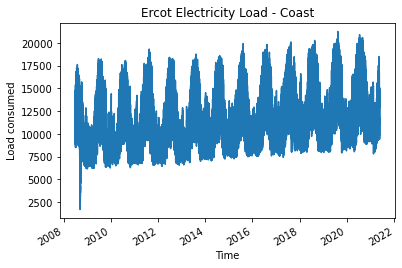

In [89]:
plt.figure(1)
plt.plot(ercot_hourly_df['Coast'])
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - Coast')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

### 2.7 download formated dataset as csv

In [90]:
ercot_hourly_df.to_csv('ercot_iso_hourly_load.csv', index=True)

## 3. Process historical tri-hourly weather dataset in major cities across ERCOT zone

### Access and process weather data

* weather_history.csv includes past weather data of 10 cities cross the 8 ECROT weather zones. The data is from World Weather Online and reported every 3 hours starting from July 1, 2008.
* weather_forecast.csv includes weather forecast of 10 cities cross the 8 ECROT weather zones. The data is from World Weather Online and forecast every 3 hours in the next 13 days (including today).

### 3.1 Import dataset from github using Pandas

In [91]:
import os, types
import pandas as pd
import io, requests

url = "https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/weather_history.csv"

s=requests.get(url).content
weather_history_df =pd.read_csv(io.StringIO(s.decode('utf-8')))



### 3.2 data exploration

In [92]:
weather_history_df.head()

,date,time,city,tempC,tempF,windspeedMiles,windspeedKmph,winddirDegree,winddir16Point,weatherCode,...,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex
0,2008-07-01,0,Abilene,21,70,4,7,173,S,113,...,76,14,57,21,70,9,15,21,70,1
1,2008-07-01,0,Austin,25,77,6,9,103,ESE,176,...,80,17,63,25,77,11,18,26,80,1
2,2008-07-01,0,Brownsville,26,79,5,8,150,SSE,113,...,84,23,74,26,79,9,14,29,84,1
3,2008-07-01,0,Corpus Christi,26,78,8,12,146,SE,113,...,83,23,73,26,78,13,21,28,83,1
4,2008-07-01,0,Dallas,25,76,6,9,149,SSE,113,...,78,12,54,25,76,11,18,25,78,1


In [93]:
weather_history_df.columns

Index(['date', 'time', 'city', 'tempC', 'tempF', 'windspeedMiles',
       'windspeedKmph', 'winddirDegree', 'winddir16Point', 'weatherCode',
       'weatherDesc', 'precipMM', 'precipInches', 'humidity', 'visibility',
       'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover',
       'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC',
       'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC',
       'FeelsLikeF', 'uvIndex'],
      dtype='object')

In [94]:
weather_history_df.dtypes

date                object
time                 int64
city                object
tempC                int64
tempF                int64
windspeedMiles       int64
windspeedKmph        int64
winddirDegree        int64
winddir16Point      object
weatherCode          int64
weatherDesc         object
precipMM           float64
precipInches       float64
humidity             int64
visibility           int64
visibilityMiles      int64
pressure             int64
pressureInches       int64
cloudcover           int64
HeatIndexC           int64
HeatIndexF           int64
DewPointC            int64
DewPointF            int64
WindChillC           int64
WindChillF           int64
WindGustMiles        int64
WindGustKmph         int64
FeelsLikeC           int64
FeelsLikeF           int64
uvIndex              int64
dtype: object

<img src="https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/ercotWeatherZoneMap.png" alt="weather zone" width="500"/>

In [95]:
print(weather_history_df['city'].unique())

['Abilene' 'Austin' 'Brownsville' 'Corpus Christi' 'Dallas' 'Houston'
 'Midland' 'San Antonio' 'Tyler' 'Wichita Falls']


### 3.3 - Data transformation

In [96]:
print(weather_history_df['time'].unique())

[   0  300  600  900 1200 1500 1800 2100]


In [97]:
weather_history_df['time'] = weather_history_df['time'].apply(lambda x: str(x).zfill(4))

In [98]:
print(weather_history_df['time'].unique())

['0000' '0300' '0600' '0900' '1200' '1500' '1800' '2100']


In [99]:
weather_history_df['date_time'] = weather_history_df['date'] + ' ' + weather_history_df['time']
weather_history_df['date_time']  = weather_history_df['date_time'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H%M"))

In [100]:
weather_history_df = weather_history_df.drop(['date','time'],axis=1)

In [101]:
weather_history_df['date_time'] = weather_history_df['date_time'].apply(lambda x: datetime.fromtimestamp(x.timestamp()))
#2021-05-17 00:00:00

In [102]:
weather_history_df.head()

,city,tempC,tempF,windspeedMiles,windspeedKmph,winddirDegree,winddir16Point,weatherCode,weatherDesc,precipMM,...,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,date_time
0,Abilene,21,70,4,7,173,S,113,Clear,0.0,...,14,57,21,70,9,15,21,70,1,2008-07-01
1,Austin,25,77,6,9,103,ESE,176,Patchy rain possible,0.6,...,17,63,25,77,11,18,26,80,1,2008-07-01
2,Brownsville,26,79,5,8,150,SSE,113,Clear,0.0,...,23,74,26,79,9,14,29,84,1,2008-07-01
3,Corpus Christi,26,78,8,12,146,SE,113,Clear,0.0,...,23,73,26,78,13,21,28,83,1,2008-07-01
4,Dallas,25,76,6,9,149,SSE,113,Clear,0.0,...,12,54,25,76,11,18,25,78,1,2008-07-01


### 3.4 - Attribute selection

In [103]:
 weather_history_df.drop(weather_history_df.columns.difference(['date_time','city','tempF','FeelsLikeF']), 1, inplace=True)

In [104]:
weather_history_df = weather_history_df.set_index(['date_time'])

In [105]:
weather_history_df.head()

,city,tempF,FeelsLikeF
date_time,,,
2008-07-01,Abilene,70,70
2008-07-01,Austin,77,80
2008-07-01,Brownsville,79,84
2008-07-01,Corpus Christi,78,83
2008-07-01,Dallas,76,78


### 3.5 Data filtering

In [106]:
weather_history_df_Houston = weather_history_df[weather_history_df['city']=='Houston']

In [107]:
weather_history_df_Houston.head()

,city,tempF,FeelsLikeF
date_time,,,
2008-07-01 00:00:00,Houston,80,85
2008-07-01 03:00:00,Houston,75,78
2008-07-01 06:00:00,Houston,73,77
2008-07-01 09:00:00,Houston,83,86
2008-07-01 12:00:00,Houston,93,97


In [108]:
weather_history_df_Houston = weather_history_df_Houston.resample("1H").mean().ffill()

In [109]:
weather_history_df_Houston.head(12)

,tempF,FeelsLikeF
date_time,,
2008-07-01 00:00:00,80.0,85.0
2008-07-01 01:00:00,80.0,85.0
2008-07-01 02:00:00,80.0,85.0
2008-07-01 03:00:00,75.0,78.0
2008-07-01 04:00:00,75.0,78.0
2008-07-01 05:00:00,75.0,78.0
2008-07-01 06:00:00,73.0,77.0
2008-07-01 07:00:00,73.0,77.0
2008-07-01 08:00:00,73.0,77.0


In [110]:
weather_history_df_Houston.head(-12)

,tempF,FeelsLikeF
date_time,,
2008-07-01 00:00:00,80.0,85.0
2008-07-01 01:00:00,80.0,85.0
2008-07-01 02:00:00,80.0,85.0
2008-07-01 03:00:00,75.0,78.0
2008-07-01 04:00:00,75.0,78.0
...,...,...
2021-05-23 05:00:00,72.0,76.0
2021-05-23 06:00:00,71.0,71.0
2021-05-23 07:00:00,71.0,71.0


In [111]:
len(weather_history_df_Houston)

113038

### 3.6 Visualize data 

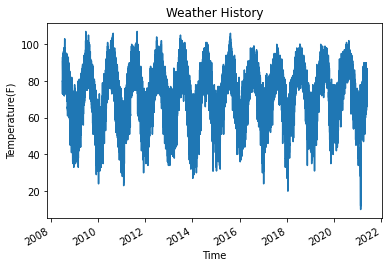

In [112]:
plt.plot(weather_history_df_Houston['tempF'])
plt.gcf().autofmt_xdate()
plt.title('Weather History')
plt.xlabel('Time')
plt.ylabel('Temperature(F)')
plt.show()

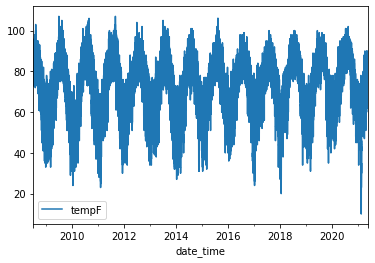

In [113]:
weather_history_df_Houston.plot(y='tempF')

### 3.7 download formated dataset as csv

In [114]:
weather_history_df_Houston.to_csv('weather_history.csv', index=True)

## 4. Combine electrical load data and weather data

In [115]:
coast_electricity_weather_hourly_df = ercot_hourly_df.join(weather_history_df_Houston)

In [116]:
coast_electricity_weather_hourly_df.head()

,Coast,tempF,FeelsLikeF
Hour_Ending_Naive,,,
2008-07-01 00:00:00,14636.792617,80.0,85.0
2008-07-01 01:00:00,14143.251055,80.0,85.0
2008-07-01 02:00:00,13818.196398,80.0,85.0
2008-07-01 03:00:00,13372.853879,75.0,78.0
2008-07-01 04:00:00,12386.530845,75.0,78.0


In [117]:
coast_electricity_weather_hourly_df.to_csv('electricity_weather_history.csv', index=True)